Exercise 4.1: evolution of age distribution.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('population_us.csv')
df

,year,age,sex,people
0,1850,0,1,1483789
1,1850,0,2,1450376
2,1850,5,1,1411067
3,1850,5,2,1359668
4,1850,10,1,1260099
...,...,...,...,...
565,2000,80,2,3221898
566,2000,85,1,970357
567,2000,85,2,1981156
568,2000,90,1,336303


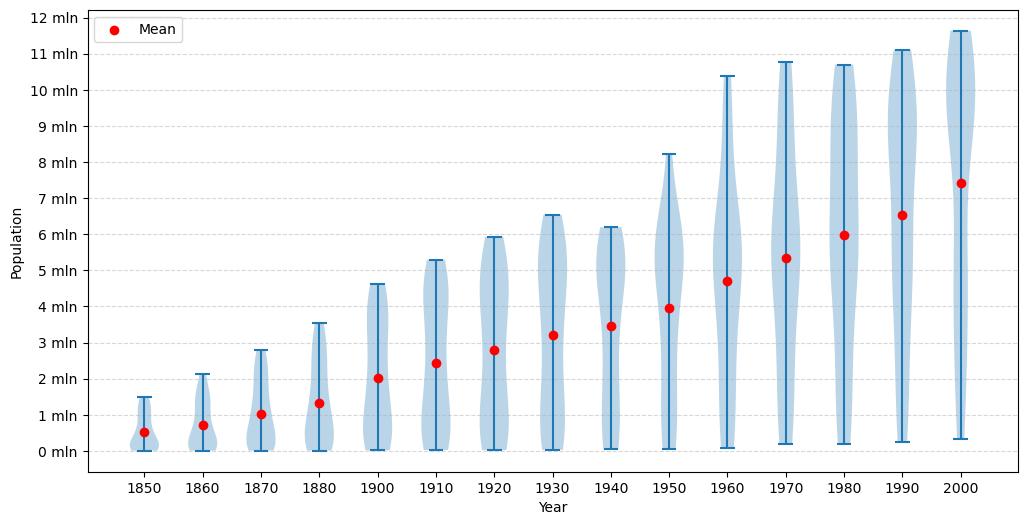

In [21]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return f'{x*1e-6:.0f} mln'



df_years = sorted(df.year.unique())
data = [df[df['year'] == y].people for y in df_years]
positions = range(len(df_years))

fig, ax = plt.subplots(figsize=(12, 6))
ax.violinplot(data, positions=positions)

means = [group.mean() for group in data]
ax.scatter(positions, means, color='red', marker='o', zorder=3, label='Mean')

# X-axis setup
ax.set_xticks(positions)
ax.set_xticklabels([str(y) for y in df_years])
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.legend()


ax.grid(axis='y', linestyle='--', alpha=0.5)

max_y = max([group.max() for group in data])
ax.set_yticks(range(0, int(max_y) + 1_000_000, 1_000_000))



ax.yaxis.set_major_formatter(FuncFormatter(millions))

plt.show()


In [ ]:
df